# Neural Network For Titanic

## Load the data

Load the data from the other proejct into memory by using the pandas library.

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import sklearn as skl
from tqdm import tqdm
the_path = Path(os.getcwd())
the_path = the_path.parents[1];
# t_data = pd.read_csv("..\..\Python_Cleaner\titanic_numerical_clean._With_Headers.csv")
# t_data.head()
the_path = the_path / 'Python_Cleaner' / 'titanic_numerical_clean._With_Headers.csv'
data = pd.read_csv(the_path, sep=",", header=0)
data = data.sample(frac=1) # reshuffle all the rows.
data.head()


,Unnamed: 0,Age,sibsp,parch,fare,female,Col,Don,Dona,Dr,...,Mrs,Ms,Rev,Sir,the Countess,Q,S,class-2,class-3,survived
868,868,43.0,0,0,6.4500,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
492,492,1.0,0,2,37.0042,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
186,186,55.0,0,0,27.7208,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
141,141,45.0,0,1,63.3583,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
716,716,26.0,1,0,14.4542,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Remove unnamed:0 if present
This is a lefot over of index of the pandas export of the project Python_cleaner


In [2]:
if 'Unnamed: 0' in data.columns:
    del data['Unnamed: 0']
data.head()

y = data.pop('survived')
X = data

## Test for the best accuracy with 10-Fold CV (Without scaling)

Create the data samples.

In [3]:
from sklearn.neural_network import MLPClassifier
import numpy as np

from sklearn.model_selection import KFold

X_np_array = np.array(X)
y_np_array = np.array(y)

kf = KFold(n_splits=10)
#for each fold. train the model and get the accuracy.
features_len = len(X_np_array[0])


# from 1 to 5 hidden layers
# from features_len -5 to features_len +5
# calculate the accuracy across the 5_folds each.
def evaluate(x_input, y_input, solver_string, list_of_hidden_layers, list_of_neurons_num,scale = False,):
    pbar = tqdm(total=(len(list_of_hidden_layers)*len(list_of_neurons_num)))
    
    results = np.zeros([len(list_of_hidden_layers), len(list_of_neurons_num)]) 
    training_results = np.zeros([len(list_of_hidden_layers), len(list_of_neurons_num)]) 
    
    mean_Accuracy = 0
    mean_accuracy_training = 0
    for hidden_layers_num in list_of_hidden_layers:
        for neurons in list_of_neurons_num:
            hidden_layers = []
            for additional in range(1,hidden_layers_num+1):
                hidden_layers.append(neurons)
            hidden_layers= tuple(hidden_layers)
            for train, test in kf.split(x_input):
                X_train, X_test, y_train, y_test = x_input[train], x_input[test], y_input[train], y_input[test]
                clf = MLPClassifier(solver=solver_string, alpha=1e-3,
                                hidden_layer_sizes=hidden_layers, random_state=1, max_iter=200)
                
                if scale:
                    scaler = skl.preprocessing.StandardScaler().fit(X_train)
                    X_train = scaler.transform(X_train)
                    X_test = scaler.transform(X_test)
                clf.fit(X_train, y_train)
                # testi accuracy
                comparison = (clf.predict(X_test) == y_test)
                accuracy = np.sum(comparison) / len(comparison) 
                mean_Accuracy += accuracy
                # training accuracy
                cp2 =  (clf.predict(X_test) == y_test)
                accuracy = np.sum(cp2) / len(cp2) 
                mean_accuracy_training += accuracy
                
            results[hidden_layers_num-1][neurons-(list_of_neurons_num[0])] = mean_Accuracy / 10
            training_results[hidden_layers_num-1][neurons-(list_of_neurons_num[0])] = mean_Accuracy / 10
            
            mean_Accuracy = 0
            accuracy_training = 0
            mean_accuracy_training = 0
            pbar.update(1)
    pbar.close()
    return (results, training_results)
            


## Get accuracy based on the amount of layers and their size ( no scaling )


In [ ]:

ev1_result = evaluate(X_np_array,y_np_array,null)
            
ev1_result

## Get accuracy based on the amount of layers and their size ( with scaling)

Randomly choos XX based on YY

In [14]:

stuff = evaluate(X_np_array,y_np_array, 'sgd', list(range(1,6)), list(range(21,32) ,True)
            
stuff


100%|██████████| 5/5 [01:33<00:00, 18.73s/it]


array([[0.80977099],
       [0.80672343],
       [0.79831474],
       [0.80596007],
       [0.80136817]])

In [15]:
stocastic_optimizer_Data = pd.DataFrame(stuff)
stocastic_optimizer_Data

stocastic_optimizer_Data

,0
0,0.809771
1,0.806723
2,0.798315
3,0.805960
4,0.801368


## Get accuracy from 1-2 layers from 1 to 20 size nodes.

This is to check if some better layer exists

In [17]:

result_1_2_layers = evaluate(X_np_array,y_np_array, 'sgd', list(range(1,3)), list(range(1,21)) ,True)
            
result_1_2_layers


100%|██████████| 40/40 [05:20<00:00,  8.00s/it]


array([[0.76929536, 0.79143864, 0.80977099, 0.78686436, 0.79906048,
        0.79983558, 0.80363476, 0.80747504, 0.80365238, 0.80442748,
        0.80748679, 0.80669407, 0.80516735, 0.80748092, 0.8082384 ,
        0.80976512, 0.80671169, 0.80823253, 0.80135643, 0.80671169],
       [0.61801527, 0.780734  , 0.79219612, 0.77311803, 0.79752789,
        0.80211979, 0.79908397, 0.8051791 , 0.79677041, 0.81206107,
        0.79908397, 0.80824427, 0.80519084, 0.8051791 , 0.80900176,
        0.80442161, 0.80061069, 0.80365238, 0.80440986, 0.80440986]])

In [23]:
_1_2_layers_Data = pd.DataFrame(result_1_2_layers) # 0.812 max
_1_2_layers_Data.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.769,0.791,0.810,0.787,0.799,0.800,0.804,0.807,0.804,0.804,0.807,0.807,0.805,0.807,0.808,0.810,0.807,0.808,0.801,0.807
1,0.618,0.781,0.792,0.773,0.798,0.802,0.799,0.805,0.797,0.812,0.799,0.808,0.805,0.805,0.809,0.804,0.801,0.804,0.804,0.804


## Learning curve

So it has been checke that 2 layers with 28 nodes gives the best accuracy
Let us check now the learning curve.

let us get also the training error.


<module 'matplotlib.pyplot' from '/home/michalkb/miniconda3/envs/PythonNN/lib/python3.8/site-packages/matplotlib/pyplot.py'>

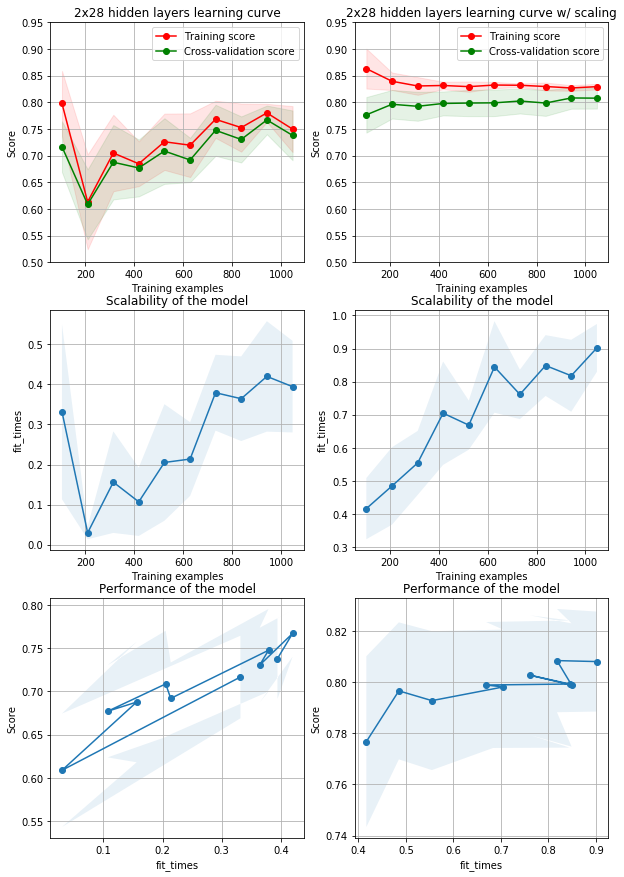

In [9]:
from sklearn.neural_network import MLPClassifier
from plotter import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

 # source : https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-download-auto-examples-model-selection-plot-learning-curve-py
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
hidden_layers = (28,28,)

estimator = MLPClassifier(solver="sgd", alpha=1e-1,
                                hidden_layer_sizes=hidden_layers, random_state=1, max_iter=1000)


scaler = skl.preprocessing.StandardScaler().fit(X_np_array)
X_scaled_data = scaler.transform(X_np_array)


plot_learning_curve(estimator, "2x28 hidden layers learning curve w/ scaling", X_scaled_data, y_np_array, axes=axes[:, 1], ylim=(0.5,0.95),
                   cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plot_learning_curve(estimator, "2x28 hidden layers learning curve", X_np_array, y_np_array, axes=axes[:, 0], ylim=(0.5,0.95),
                   cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(estimator, X_np_array, y_np_array, cv=3))

1309